<a href="https://colab.research.google.com/github/27priyanshu/phishing-classification/blob/main/phishing_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/ektanegi25/Phishing-Classifier/main/Phishing_Legitimate_full.csv")
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.000,0.250000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,1,0,0.000,0.000000,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27,24,0,0,0,0,0.375,1.000000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,22,50,0,0,0,1,1.000,0.095238,1,1,0,0,0,0.0,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,10,29,0,0,0,0,1.000,1.000000,0,0,0,1,0,0.0,1,0,0,0,0,1,0,0,1,1,-1,0,-1,-1,1


In [23]:
df.shape

(10000, 50)

In [24]:
df.tail()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
9995,9996,3,1,1,50,0,0,0,0,0,0,2,1,0,9,1,0,0,0,0,0,15,10,17,0,0,0,0.096774,0.757143,1,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,19,33,0,0,0,0,0.161290,0.275862,0,1,0,0,0,0.129032,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,0,0,0,0,6,1,1,0,0,0,0,16,34,0,0,0,0,0.070423,0.500000,0,1,0,0,0,0.056338,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,0,1,0,0,3,1,0,0,0,0,0,15,13,13,0,0,0,0.166667,0.428571,0,1,1,0,0,0.000000,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0
9999,10000,3,1,2,52,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,10,35,0,0,0,0,0.089623,0.042553,0,1,0,0,0,0.004717,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0


In [25]:
df.drop('id', axis=1,inplace=True)

In [26]:
df

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.000000,0.250000,1,1,0,0,0,0.000000,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,1,0,0.000000,0.000000,0,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27,24,0,0,0,0,0.375000,1.000000,1,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,22,50,0,0,0,1,1.000000,0.095238,1,1,0,0,0,0.000000,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,10,29,0,0,0,0,1.000000,1.000000,0,0,0,1,0,0.000000,1,0,0,0,0,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,1,1,50,0,0,0,0,0,0,2,1,0,9,1,0,0,0,0,0,15,10,17,0,0,0,0.096774,0.757143,1,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,1,-1,1,0,1,0
9996,2,1,4,59,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,19,33,0,0,0,0,0.161290,0.275862,0,1,0,0,0,0.129032,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0
9997,2,1,4,57,0,0,0,0,0,0,0,0,0,6,1,1,0,0,0,0,16,34,0,0,0,0,0.070423,0.500000,0,1,0,0,0,0.056338,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
9998,3,1,1,49,0,0,0,0,0,0,1,0,0,3,1,0,0,0,0,0,15,13,13,0,0,0,0.166667,0.428571,0,1,1,0,0,0.000000,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0


In [27]:
!pip install sweetviz

In [28]:
import sweetviz as sv

sweet_report = sv.analyze(df)
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [29]:
! pip install autoviz

In [30]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Shape of your Data Set loaded: (10000, 50)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  21
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  23
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  1
    49 Predictors classified...
        2 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['id', 'HttpsInHostname']

################ Binary_Classification

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
PctExtNullSelfRedirectHyperlinksRT,int64,0.000000,0,-1.000000,1.000000,No issue
PctExtHyperlinks,float64,0.000000,NA,0.000000,1.000000,Column has 666 outliers greater than upper bound (0.60) or lower than lower bound(-0.31). Cap them or remove them.
FrequentDomainNameMismatch,int64,0.000000,0,0.000000,1.000000,No issue
IpAddress,int64,0.000000,0,0.000000,1.000000,No issue
InsecureForms,int64,0.000000,0,0.000000,1.000000,No issue
PctExtResourceUrls,float64,0.000000,NA,0.000000,1.000000,No issue
PctNullSelfRedirectHyperlinks,float64,0.000000,NA,0.000000,1.000000,Column has 757 outliers greater than upper bound (0.10) or lower than lower bound(-0.06). Cap them or remove them.
SubmitInfoToEmail,int64,0.000000,0,0.000000,1.000000,No issue
ExtMetaScriptLinkRT,int64,0.000000,0,-1.000000,1.000000,Column has 2690 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.
NumSensitiveWords,int64,0.000000,0,0.000000,3.000000,Column has 443 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.


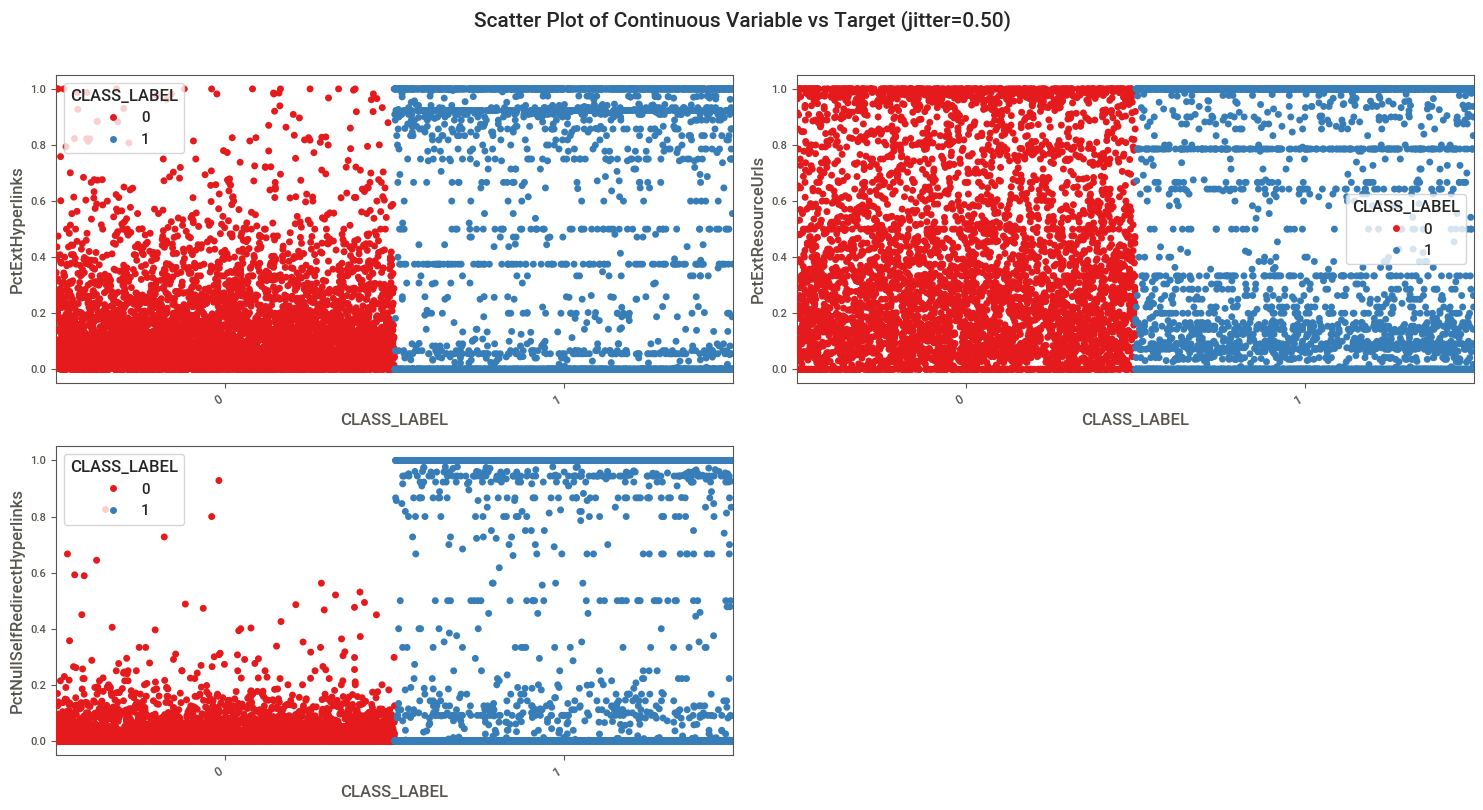

Total Number of Scatter Plots = 6


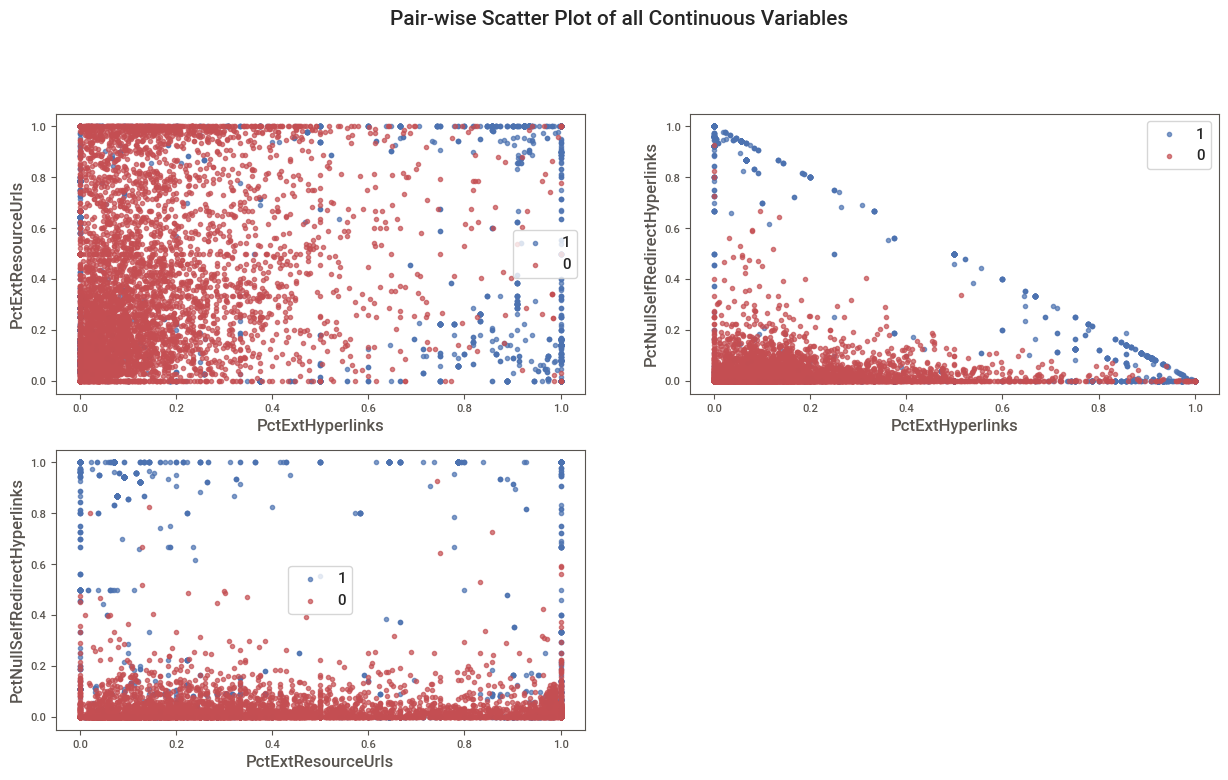

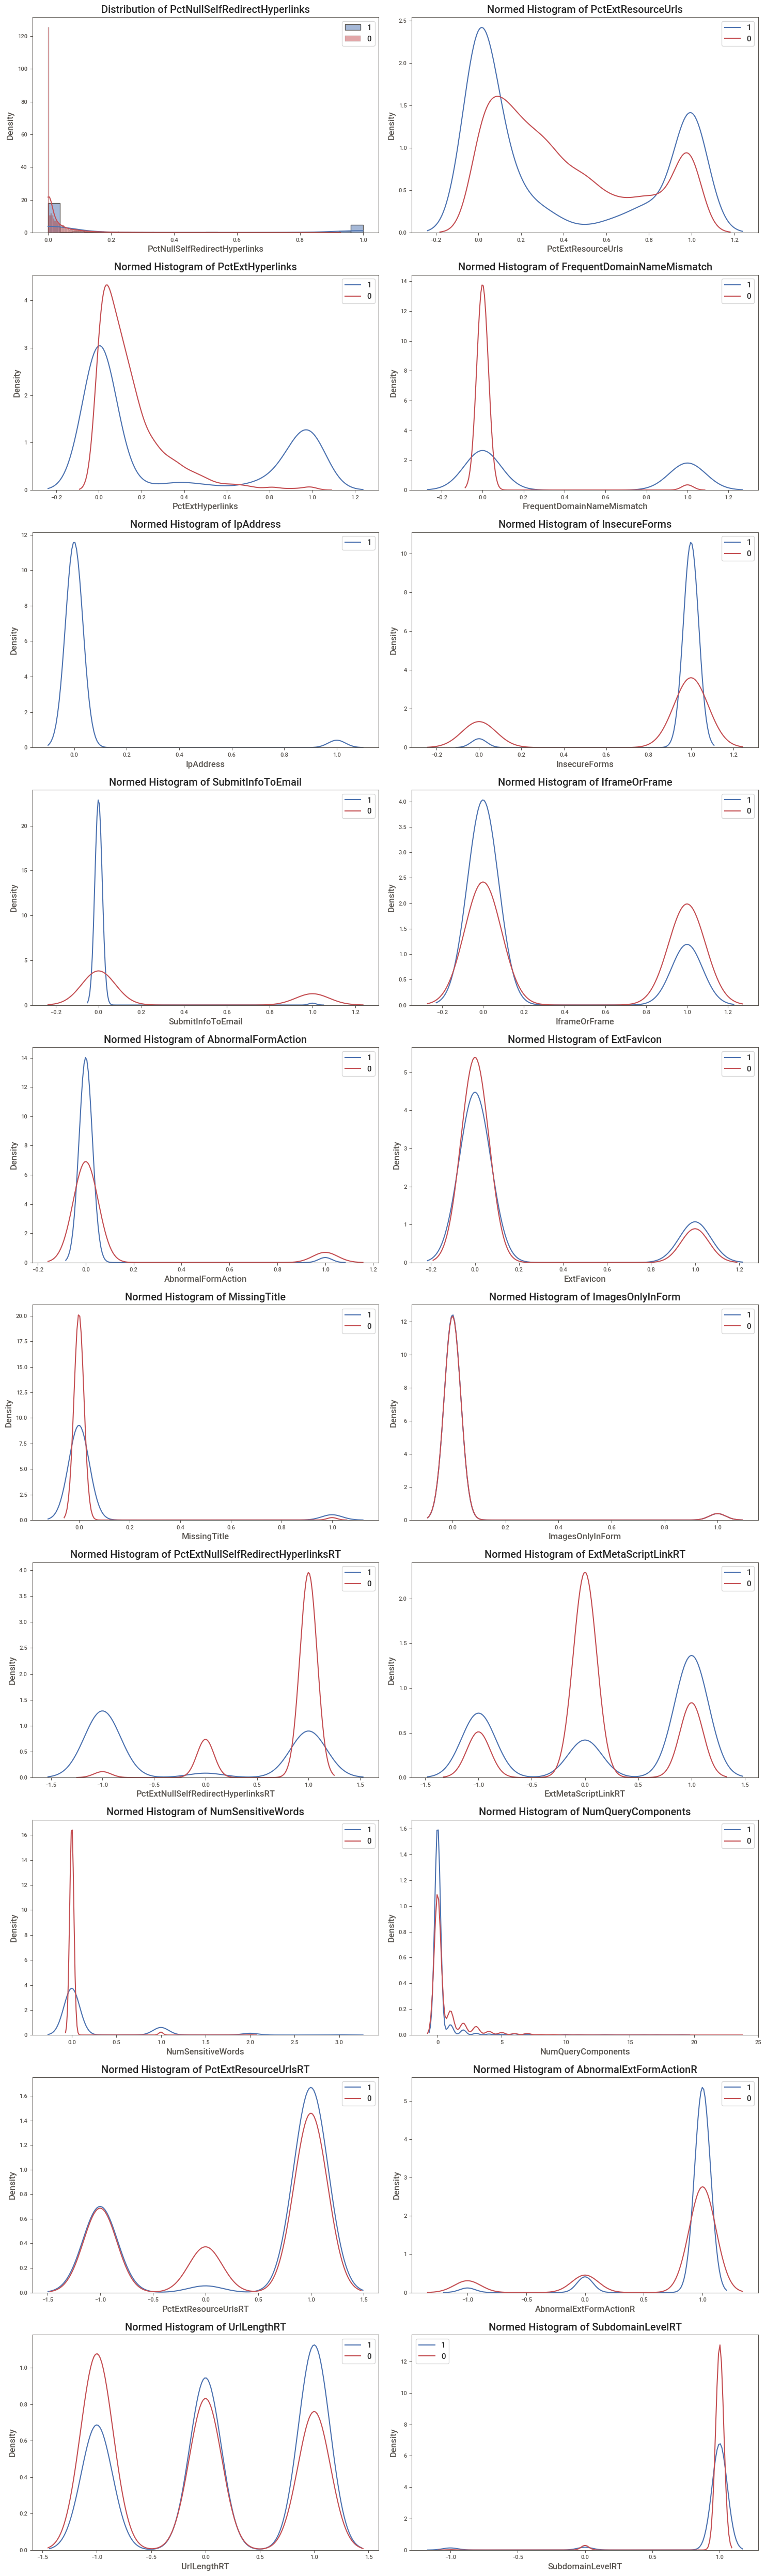

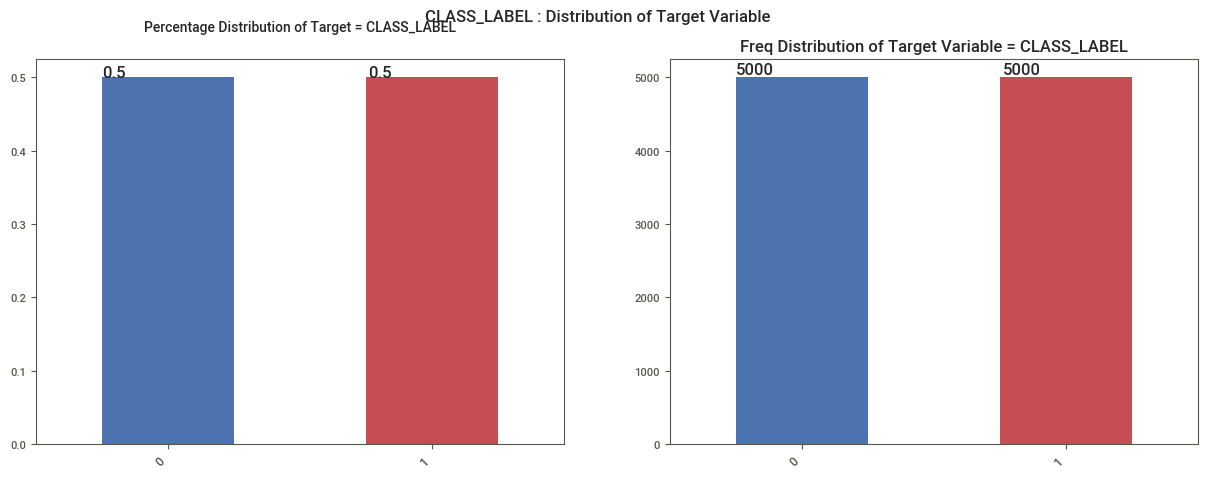

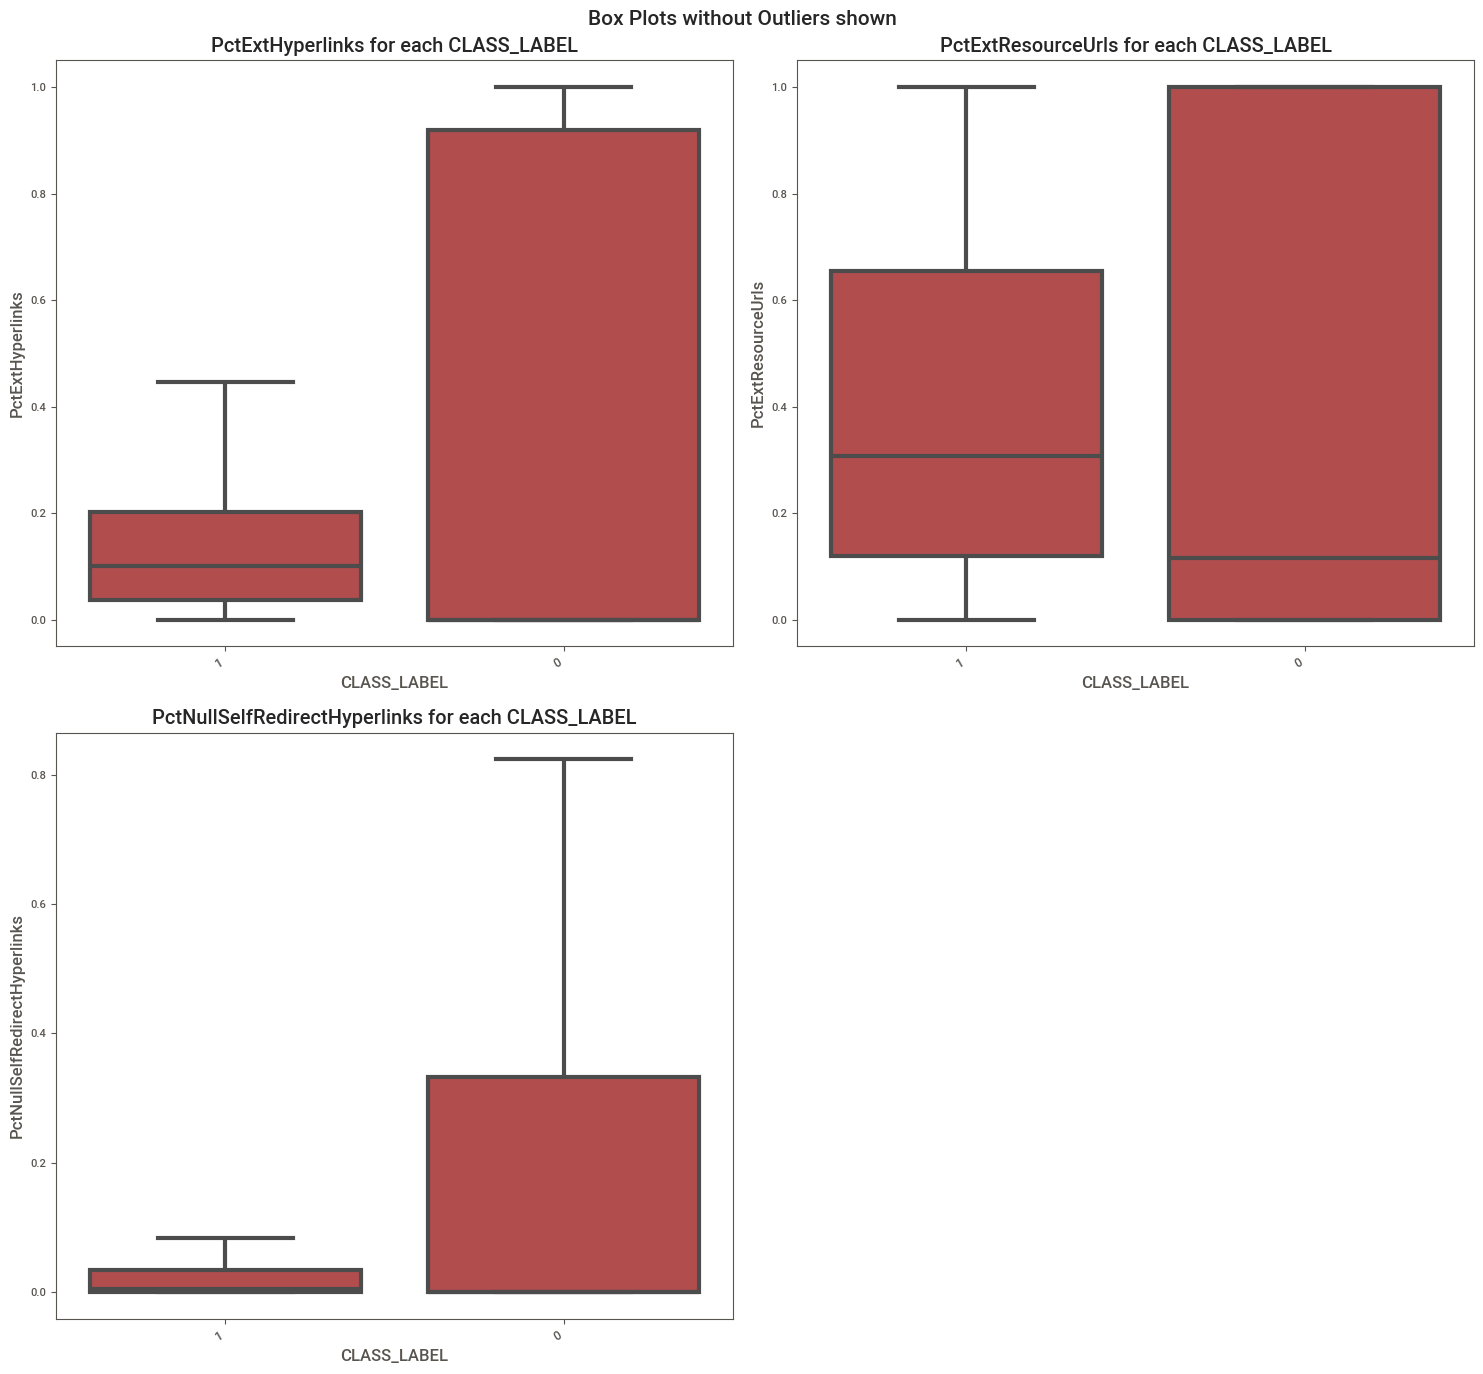

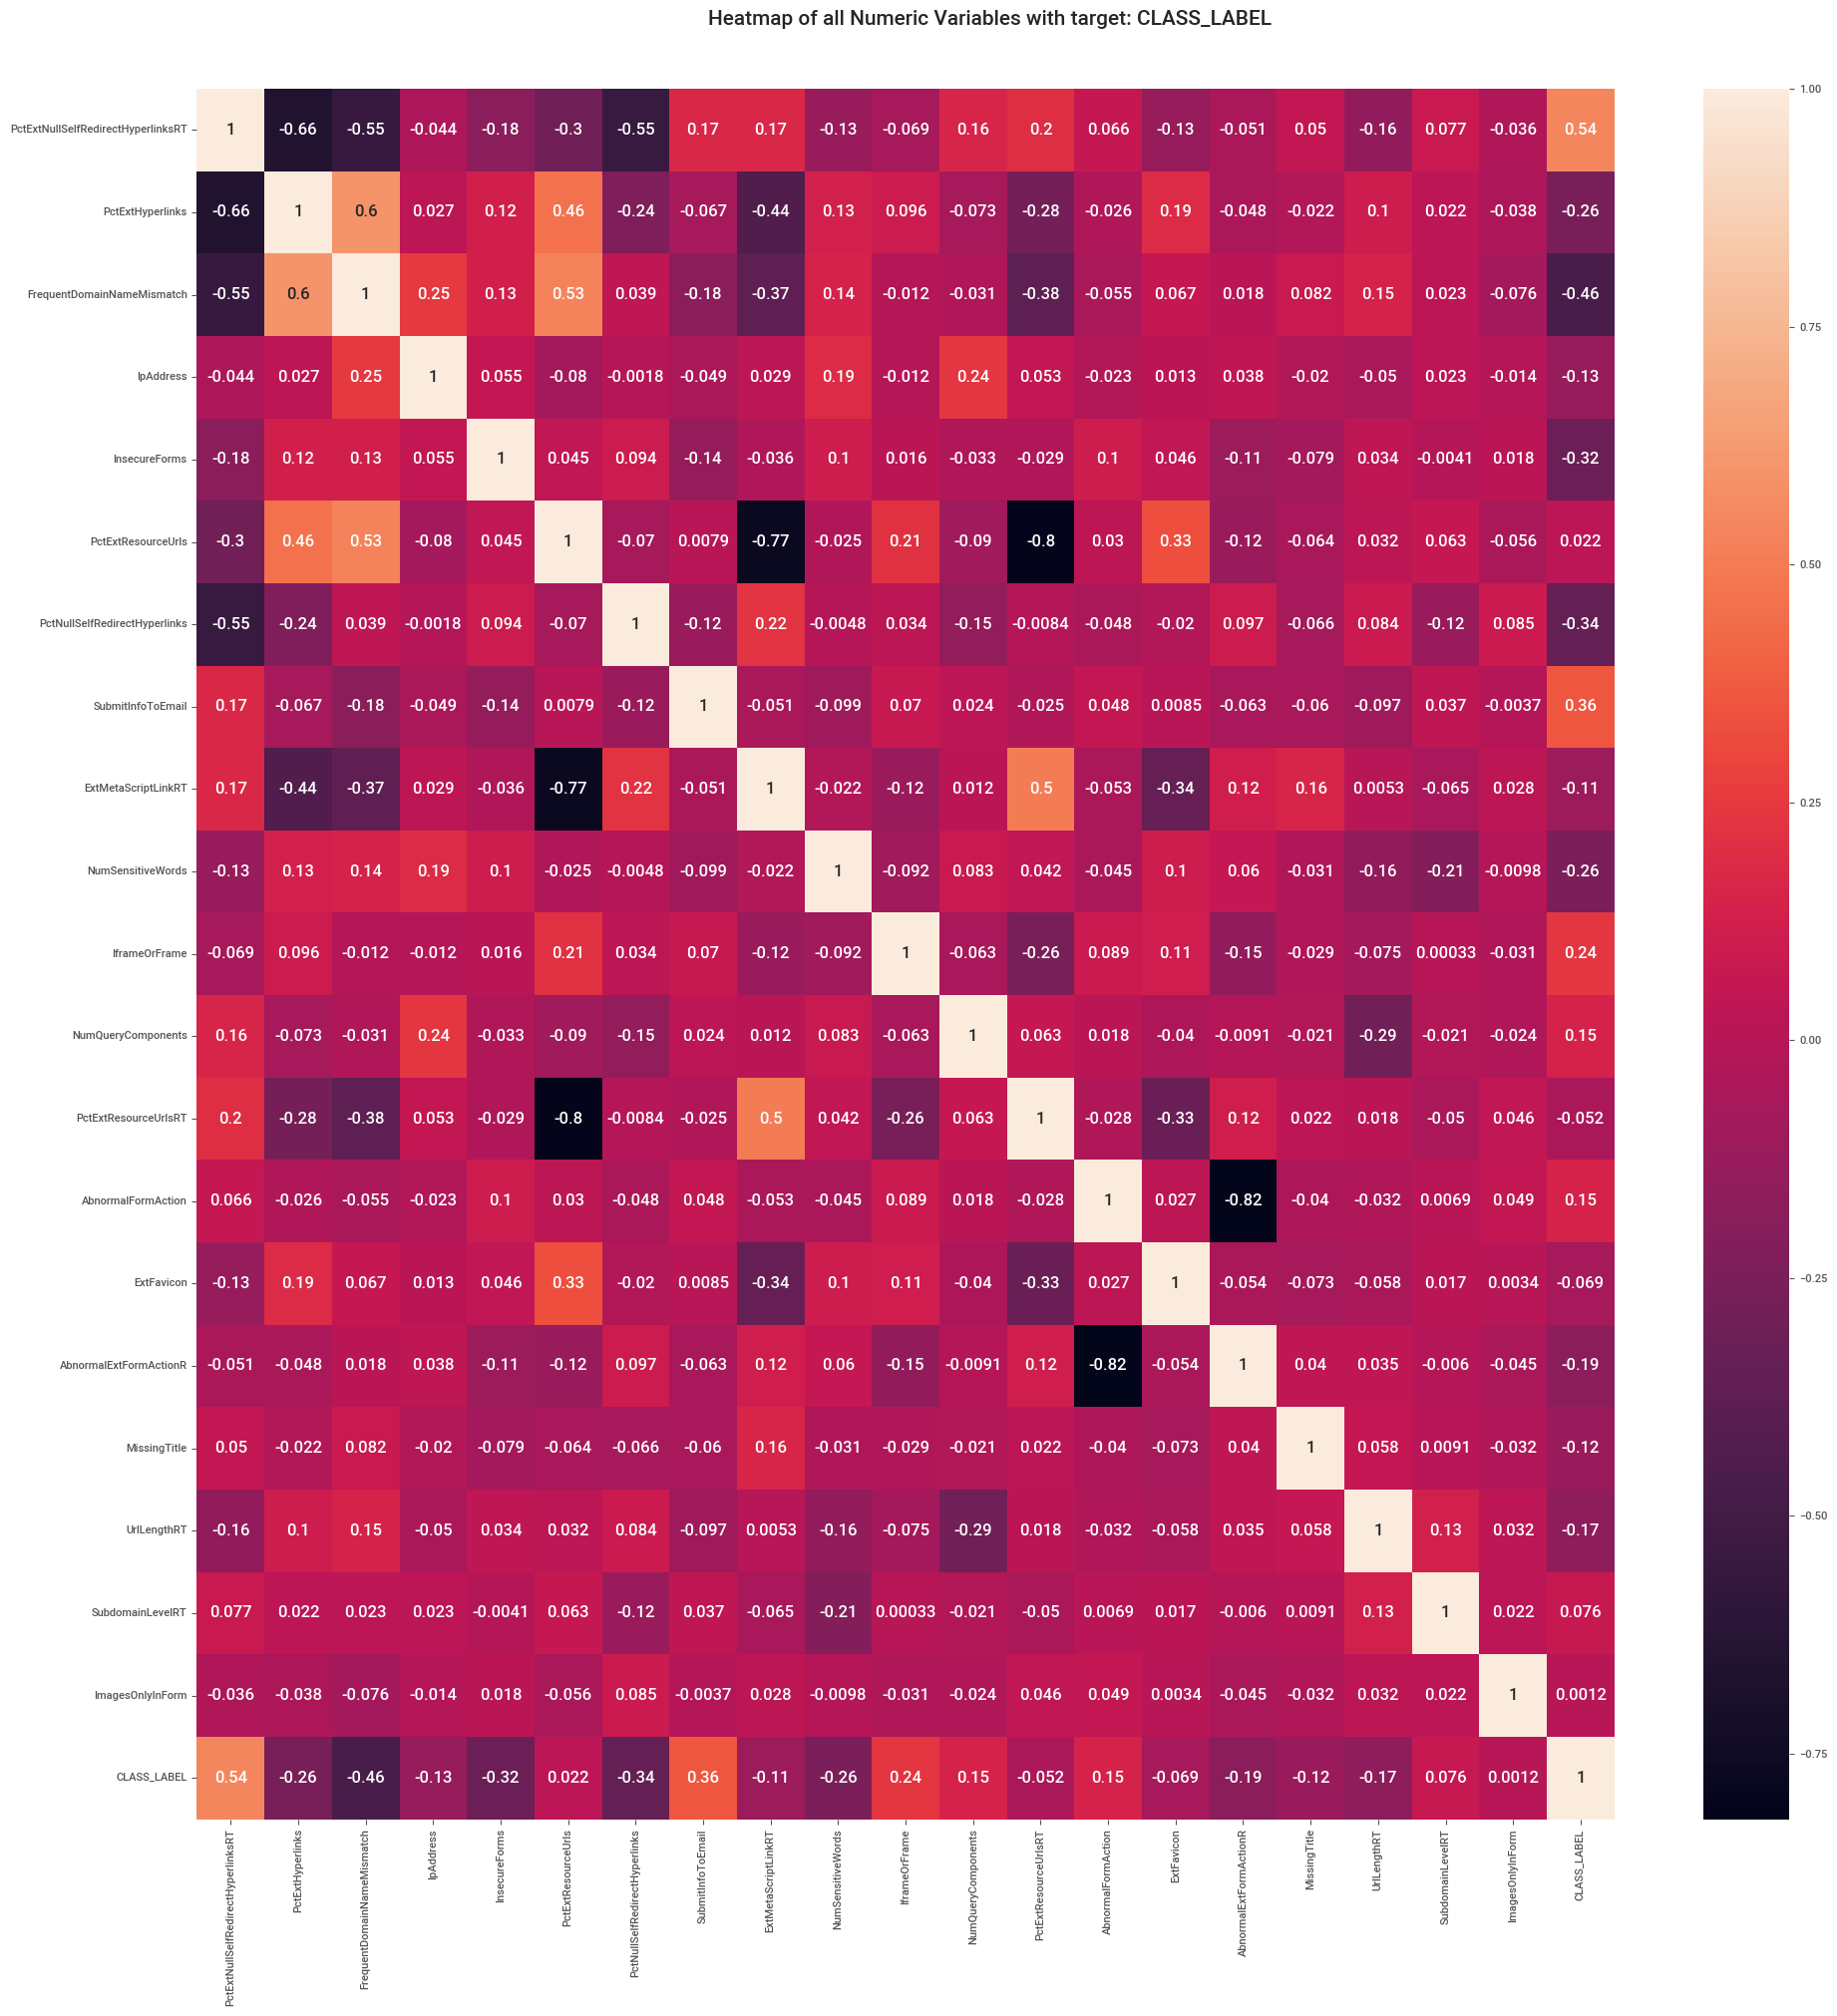

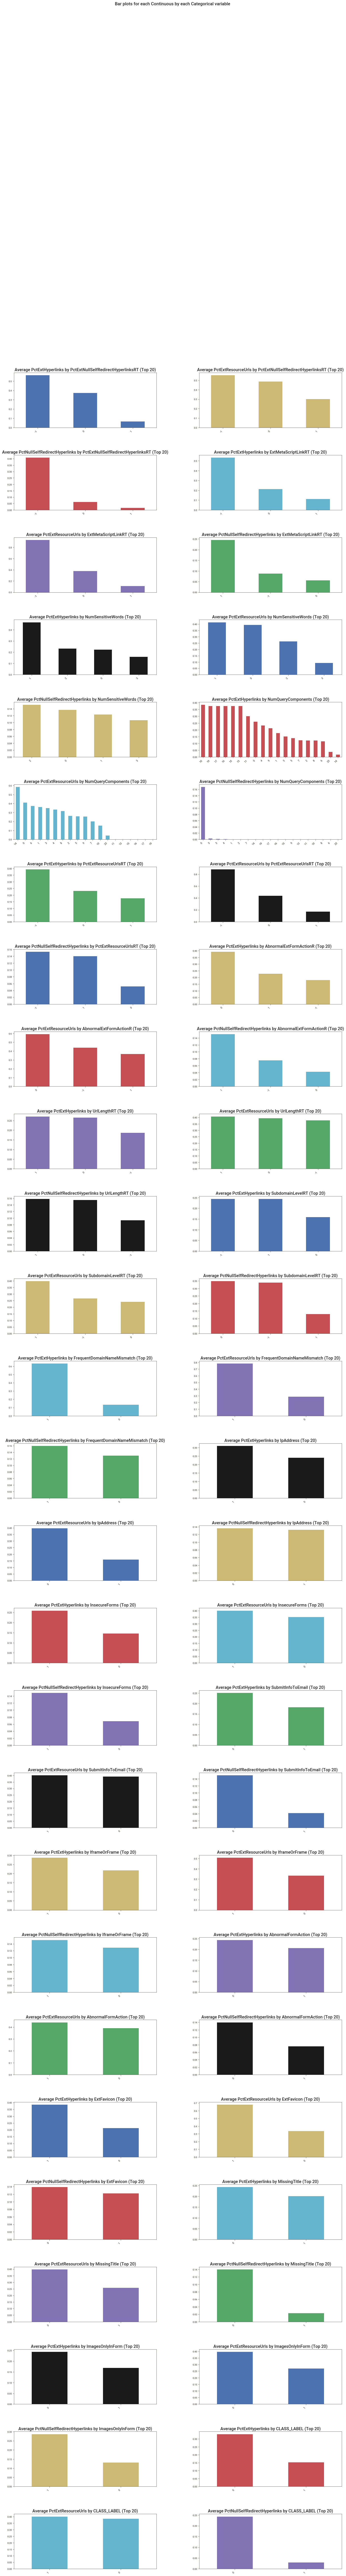

All Plots done
Time to run AutoViz = 40 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,PctExtNullSelfRedirectHyperlinksRT,PctExtHyperlinks,FrequentDomainNameMismatch,IpAddress,InsecureForms,PctExtResourceUrls,PctNullSelfRedirectHyperlinks,SubmitInfoToEmail,ExtMetaScriptLinkRT,NumSensitiveWords,IframeOrFrame,NumQueryComponents,PctExtResourceUrlsRT,AbnormalFormAction,ExtFavicon,AbnormalExtFormActionR,MissingTitle,UrlLengthRT,SubdomainLevelRT,ImagesOnlyInForm,CLASS_LABEL
0,1,0.000000,0,0,1,0.250000,0.000000,0,-1,0,0,0,1,0,1,1,0,0,1,1,0
1,1,0.000000,0,0,1,0.000000,0.000000,0,1,1,0,2,1,0,0,1,0,-1,1,0,0
2,0,0.375000,0,0,1,1.000000,0.000000,0,-1,0,0,0,-1,0,1,1,0,0,1,0,0
3,-1,1.000000,1,0,1,0.095238,0.000000,1,1,0,0,0,1,0,1,1,0,-1,1,0,0
4,-1,1.000000,1,0,0,1.000000,0.000000,0,-1,0,1,0,-1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0.096774,0,0,1,0.757143,0.000000,0,0,0,0,2,-1,0,1,1,0,1,1,0,1
9996,1,0.161290,0,0,1,0.275862,0.129032,0,0,0,1,0,0,0,0,1,0,0,1,0,1
9997,1,0.070423,0,0,1,0.500000,0.056338,0,0,0,0,0,1,0,0,1,0,0,1,0,1
9998,1,0.166667,0,0,1,0.428571,0.000000,0,0,0,1,1,0,0,0,1,0,1,1,0,1


In [31]:
df_auto = AV.AutoViz("https://raw.githubusercontent.com/ektanegi25/Phishing-Classifier/main/Phishing_Legitimate_full.csv", depVar = 'CLASS_LABEL')
df_auto

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int64  
 1   SubdomainLevel                      10000 non-null  int64  
 2   PathLevel                           10000 non-null  int64  
 3   UrlLength                           10000 non-null  int64  
 4   NumDash                             10000 non-null  int64  
 5   NumDashInHostname                   10000 non-null  int64  
 6   AtSymbol                            10000 non-null  int64  
 7   TildeSymbol                         10000 non-null  int64  
 8   NumUnderscore                       10000 non-null  int64  
 9   NumPercent                          10000 non-null  int64  
 10  NumQueryComponents                  10000 non-null  int64  
 11  NumAmpersand                        10000 

In [33]:
float_cols = df.select_dtypes('float64').columns
for i in float_cols:
    df[i] = df[i].astype('float32')

int_cols = df.select_dtypes('int64').columns
for i in int_cols:
    df[i] = df[i].astype('int32')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int32  
 1   SubdomainLevel                      10000 non-null  int32  
 2   PathLevel                           10000 non-null  int32  
 3   UrlLength                           10000 non-null  int32  
 4   NumDash                             10000 non-null  int32  
 5   NumDashInHostname                   10000 non-null  int32  
 6   AtSymbol                            10000 non-null  int32  
 7   TildeSymbol                         10000 non-null  int32  
 8   NumUnderscore                       10000 non-null  int32  
 9   NumPercent                          10000 non-null  int32  
 10  NumQueryComponents                  10000 non-null  int32  
 11  NumAmpersand                        10000 

In [35]:
df.rename(columns = {'CLASS_LABEL': 'labels' }, inplace = True)

In [36]:
df.sample(10)

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
4261,2,0,3,54,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,20,27,0,0,0,0,0.000000,0.000000,0,1,1,0,0,0.000000,0,0,0,0,0,0,1,0,1,0,1,1,1,1,1
6260,4,2,2,95,0,0,0,0,1,0,3,2,0,10,1,1,0,0,0,0,26,18,43,0,0,0,0.072727,0.000000,0,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,-1,1,1,1,1,0
7458,2,0,5,73,1,0,0,0,1,0,0,0,0,16,1,1,0,0,0,0,18,48,0,0,0,0,0.166667,0.615385,0,0,0,0,0,0.029167,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
1685,3,1,3,52,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,22,23,0,0,0,0,0.000000,0.000000,0,1,1,0,0,1.000000,0,0,0,0,0,0,0,0,1,1,1,1,1,-1,1
4518,3,0,3,39,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,10,22,0,0,0,0,0.083333,0.900000,1,1,1,0,0,0.166667,1,0,0,0,0,0,0,0,1,1,-1,1,0,1,1
2910,2,1,8,60,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,21,32,0,0,0,0,0.000000,0.000000,0,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1
2305,2,0,3,43,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,15,21,0,0,0,0,0.000000,0.000000,0,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
6283,3,0,2,61,1,1,0,0,0,0,1,0,0,11,1,1,0,0,0,0,14,18,21,0,0,0,0.275000,0.028571,0,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0
6129,3,1,3,106,8,0,0,0,0,0,0,0,0,7,1,1,0,0,1,0,24,75,0,0,0,0,0.029575,0.083333,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,-1,1,1,0,1,0
4757,3,1,4,66,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,17,42,0,0,1,0,1.000000,1.000000,0,1,0,0,0,0.000000,1,0,0,0,0,1,0,0,1,0,-1,1,-1,-1,1


In [37]:
df.describe()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,0.458600,0.277200,0.002300,5.810300,0.988800,0.52520,0.017200,0.022200,0.428900,0.0,18.82430,35.564900,8.606500,0.000900,0.109300,0.057100,0.241334,0.392932,0.167200,0.844000,0.248700,0.1018,0.057600,0.136136,0.215300,0.005500,0.014000,0.004900,0.128800,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,1.344793,1.117356,0.047906,9.617877,0.105241,0.49939,0.130023,0.147341,0.494944,0.0,8.11654,24.588502,24.313053,0.029988,0.368737,0.232045,0.342370,0.387292,0.373173,0.362873,0.432281,0.3024,0.232997,0.312413,0.411051,0.073961,0.117496,0.069832,0.334995,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.0,14.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.0,18.00000,30.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.247511,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.0,22.00000,48.000000,0.000000,0.000000,0.000000,0.000000,0.315874,0.785714,0.000000,1.000000,0.000000,0.0000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0

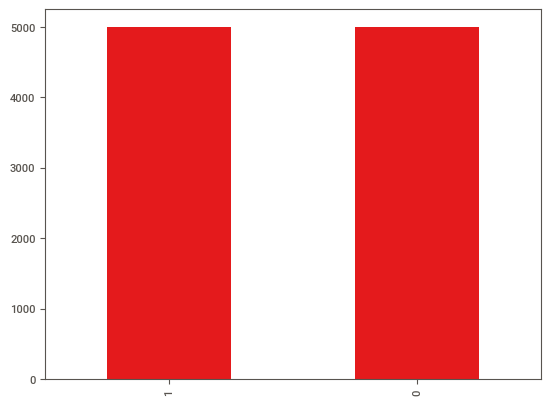

In [39]:
df['labels'].value_counts().plot(kind = 'bar')
plt.show()

In [40]:
def corr_heatmap(data, idx_s, idx_e):
    y = data['labels']
    temp = data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['labels'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()

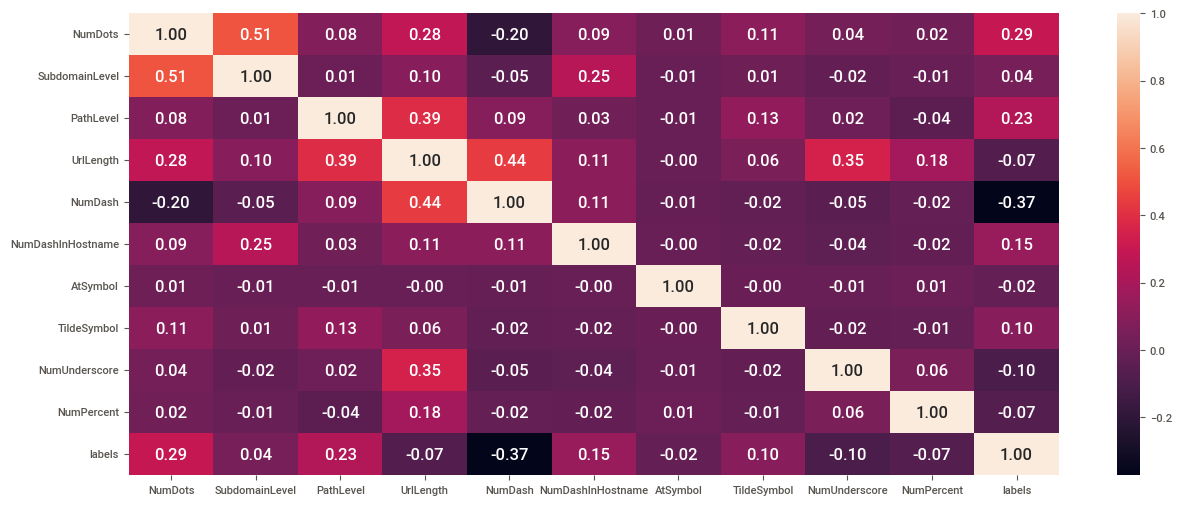

In [41]:
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] =(15,6)
corr_heatmap(df, 0, 10)